In [1]:
%matplotlib inline

## Sigmoid

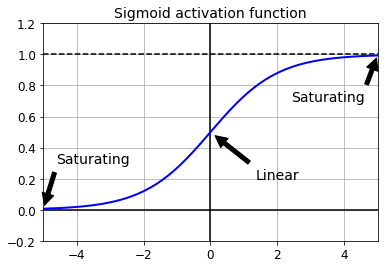

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
z = np.linspace(-5,5,200)

def logit(z):
    return 1 / (1 + np.exp(-z))


plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1),
             arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0),
             arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5),
             arrowprops=props, fontsize=14, ha="center")
plt.axis([-5, 5, -0.2, 1.2])
plt.title("Sigmoid activation function", fontsize=14)
plt.grid(True)
plt.show()

公式：$\sigma\left(x\right)= \frac{1}{1+e^{\left(-x\right)}}$

从上面的图可以看出，当输入的值比较大或者比较小的时候值会保持在 $0$ 和 $1$，常被称为 saturates。当对这些位置进行求导的时候，值接近于 $0$。再进行 BP 对的时候，回传的信号会越来越弱，这种情况被称作梯度消失(vanishing gradients)。

- 优点：它能够把输入的连续实值“压缩”到 $0$ 和 $1$ 之间。可以用来做二分类问题。
- 缺点：sigmoid 有一个非常致命的缺点，当输入非常大或者非常小的时候，这些神经元的梯度是接近于 $0$ 的，容易造成梯度小时，导致网络变的很难学习。Sigmoid 函数的输出不是零中心的。因为如果输入神经元的数据总是正数，那么关于 的梯度在反向传播的过程中，将会要么全部是正数，要么全部是负数，这将会导致梯度下降权重更新时出现 Z 字型的下降。Sigmoid 函数有 exp 计算会比较耗时。

## Tanh

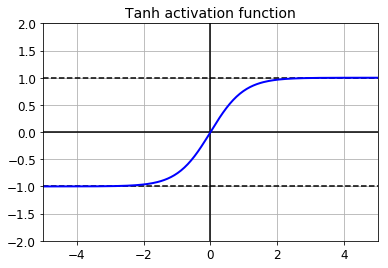

In [3]:
plt.plot([-5,5],[0,0],'k-')#
plt.plot([-5,5],[1,1],'k--')
plt.plot([-5,5],[-1,-1],'k--')#(-5,-1),(5,-1)
plt.plot([0, 0], [-2, 2], 'k-')
plt.plot(z, np.tanh(z), "b-",linewidth=2)
plt.axis([-5, 5, -2, 2])
plt.title("Tanh activation function", fontsize=14)
plt.grid(True)
plt.show()

公式：$\tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}=2\sigma\left(2x\right)-1$

从图中可以看出，tanh 和 sigmod 非常类似，只是取值范围为 $[-1,1]$，因此 tanh 也面临这梯度消失的问题。

## ReLU 和 LeakyReLU

选择一个好的激活函数就能够很大程度上避免梯度消失问题，例如 Relu, 但这种方法会面临一个问题，在训练过程中部分神经元消失了，也就是这些神经元只会输出 $0$，特别是当学习率比较大的时候，一旦出现这种情况，这些神经元就不会再复活。为了解决这一问题，有一种方法被提出，叫做 LeakyReLU，公式很简单：$\text{LeakyReLU}(z)= \max(az,z)$

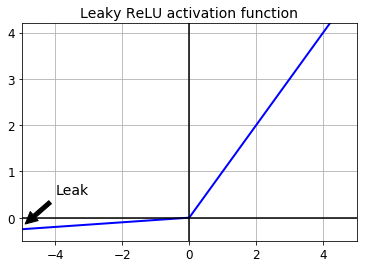

In [4]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

上图激活函数有一个参数 $a$，控制着 leaks 的数量，斜率非常的小，但是能够保证神经元不会消失，相关研究发现，LeakyReLu 的效果要优于 ReLU。常用的 LeakyReLU 变体有

1. Randomized leaky ReLU(RReLU)：在训练过程中 $a$ 是从一组选项中随机选择的，在测试过程中使用它们的平均值。
2. Parametric leaky ReLU(PReLU)：$a$ 是从训练集中学习得到，在较大的数据集上面效果较好，在较小的数据集上面有 overfitting 的风险。

## ELU

在 2015 年一篇名为《Fast and Accurate Deep Network Learning by Exponential Linear Units》,提出了一种新的激活函数ELU，不过和之前的 ReLU 相似，公式如下

$$
ELU(z) = \begin{cases}\alpha \exp(z) - 1 & \text{if } z < 0 \\
z & \text {if } z \geq 0 
\end{cases}
$$

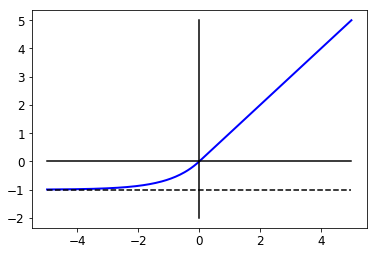

In [5]:
def elu(z,alpha=1):
    return np.where(z<0,alpha*(np.exp(z) - 1),z)
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')#(x)
plt.plot([0, 0], [-2, 5], 'k-')#(y)
plt.plot([-5,5],[-1,-1],'k--') #(虚线)
plt.show()

ELU被提出，必定存在它的优越之处：

1. 在 $z<0$ 时候 能够让神经元的输出均值接近 $0$，$a$ 控制着在 $z<0$ 时，激活函数的趋势，
2. 整个函数处处可导，当 $z<0$ 时，梯度的值不为 $0$，避免了神经元挂掉的问题

## SELU

计算及技术发展日新月异，一项牛逼的技术刚出来还没火几天，就可能会有一个更牛逼的出来，下面有请 [scaled exponential linear units](https://arxiv.org/pdf/1706.02515.pdf)，selu，满篇幅的公式。

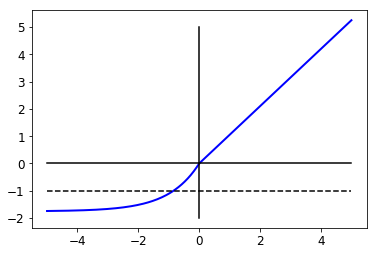

In [6]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')#(x)
plt.plot([0, 0], [-2, 5], 'k-')#(y)
plt.plot([-5,5],[-1,-1],'k--') #(虚线)
plt.show()

这个公式的牛逼之处在于在 $100$ 层的神经网络训练过程中，能够保证均值接近 $0$，方差为 $1$。能够有效的避免梯度消失问题。这个激活函数和 Batch Normalization 目的类似，都是避免神经元的输出值发生飘移。下面模拟一个 $100$ 层的网络，

In [7]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))#模拟的输入x
for layer in range(100):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=1)
    stds = np.std(Z, axis=1)
    if layer % 10 == 0:
        print("Layer {}: {:.2f} < mean < {:.2f}, {:.2f} < std deviation < {:.2f}".format(
            layer, means.min(), means.max(), stds.min(), stds.max()))

Layer 0: -0.26 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 10: -0.24 < mean < 0.27, 0.74 < std deviation < 1.27
Layer 20: -0.17 < mean < 0.18, 0.74 < std deviation < 1.24
Layer 30: -0.27 < mean < 0.24, 0.78 < std deviation < 1.20
Layer 40: -0.38 < mean < 0.39, 0.74 < std deviation < 1.25
Layer 50: -0.27 < mean < 0.31, 0.73 < std deviation < 1.27
Layer 60: -0.26 < mean < 0.43, 0.74 < std deviation < 1.35
Layer 70: -0.19 < mean < 0.21, 0.75 < std deviation < 1.21
Layer 80: -0.18 < mean < 0.16, 0.72 < std deviation < 1.19
Layer 90: -0.19 < mean < 0.16, 0.75 < std deviation < 1.20


TF 实现 SELU 的方法

In [8]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

## 总结

一下子讲了这么多的激活函数，那么到底该怎么选择呢？一般来说的选择顺序为:
    
`ELU(SELU) > leaky ReLU(变体) > ReLU > tanh > logistic`

如果想要快，那就选用 RELU，如果不想调节参数那就使用默认的参数($0.01$ for Leaky ReLU,$1$ for ELU)，如果时间和计算力充足，那就 RRELU 或 PReLU 来个 cross-validation。